<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/King_Couty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importando a biblioteca que pega a cidade utilizando o zip
!pip install pyzipcode -q

In [5]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.graph_objs import *
import plotly.express as px
from pyzipcode import ZipCodeDatabase


Importação dos dados e análise inicial




In [6]:
#Leitura dos dados

df = pd.read_csv('/content/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#verificar se o imóvel foi vendido mais de uma vez no período. 
#O [:10] é dentro de uma lista como eu faço um head(10)
df['id'].value_counts()[:10]
#Por padrão o value_counts mostra em ordem decrescente (maior para o menor) e exclui valores nulos, olhar a biblioteca

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
1954420170    2
6381500170    2
7167000040    2
9407110710    2
1000102       2
Name: id, dtype: int64

In [8]:
#Analisando o imóvel mais vendido - 3 vendas em 1 ano (2014-2015)
df[df['id'] == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,...,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


In [9]:
#Testando pra outro imóvel que foi vendido mais de uma vez
df[df['id'] == 8651510380]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6789,8651510380,20140821T000000,310000.0,3,2.0,2070,9195,1.0,0,0,...,8,1220,850,1982,0,98074,47.6491,-122.061,2080,9551
6790,8651510380,20141216T000000,539000.0,3,2.0,2070,9195,1.0,0,0,...,8,1220,850,1982,0,98074,47.6491,-122.061,2080,9551


In [10]:
#Testando novamente pra outro imóvel que foi vendido mais de uma vez
df[df['id'] == 9407110710]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2493,9407110710,20141107T000000,195000.0,3,1.75,1510,8400,1.0,0,0,...,7,980,530,1979,0,98045,47.4476,-121.771,1500,10125
2494,9407110710,20150226T000000,322000.0,3,1.75,1510,8400,1.0,0,0,...,7,980,530,1979,0,98045,47.4476,-121.771,1500,10125


In [11]:
#Até então todos os imóveis que foram testados acima se valorizaram ao serem vendidos

In [12]:
#Verificando os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
#Mudando a formatação da coluna data, o Y é maiusculo
df['date'] = pd.to_datetime(df['date'],format='%Y%m%dT000000')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
#verificando as últimas linhas
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [15]:
#Criando uma coluna chamada City com valores nulos pra poder usar a função abaixo
df['City'] = np.nan

In [16]:
#Baxei a biblioteca pra poder indetificar a cidade associada a esse zipcode
! pip install uszipcode
from uszipcode import SearchEngine
engine = SearchEngine()
for index, row in df.iterrows():
  zipcode = engine.by_zipcode(df['zipcode'][index])
  df['City'][index] = zipcode.major_city

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 120 kB 63.4 MB/s 
     |████████████████████████████████| 45 kB 2.6 MB/s 
     |████████████████████████████████| 41 kB 323 kB/s 


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


In [18]:
#area livre pra construção - indicativo de expansão
#Diferença entre a área total - área habitável
df['sqft_free']= df['sqft_lot'] - df['sqft_living']

In [19]:
# O custo por metro ao quadradro é Cm2 = Preco da Venda/tamanho da casa
#preço por area habitavel
df['$/ft2_living'] = df['price']/df['sqft_living']

In [20]:
#preço por area do lote
# df.sample - Retorna uma amostra aleatória de itens de um dataframe
df['$/ft'] = df['price']/df['sqft_lot']
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft
18629,3501600215,2015-04-14,380000.0,2,1.0,1000,4800,1.0,0,0,...,0,98117,47.6926,-122.362,1000,4800,Seattle,3800,380.0,79.166667


In [21]:
#Ordena o dataset conforme id e a data para podermos calcular o lucro por período, observe que tem id que se repetem
#Resetando o indice reset_index
df.sort_values(['id', 'date']).reset_index(drop=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft
0,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,...,0,98002,47.3262,-122.214,2060,7316,Auburn,6973,116.666667,29.873040
1,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,0,98002,47.3262,-122.214,2060,7316,Auburn,6973,125.000000,32.006828
2,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,...,0,98166,47.4444,-122.351,2590,21891,Seattle,23976,314.320388,24.869412
3,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,...,0,98166,47.4434,-122.347,2250,20023,Seattle,41540,273.972603,9.302326
4,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,...,0,98168,47.4783,-122.265,1290,10320,Seattle,6169,164.335664,30.925122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,9842300095,2014-07-25,365000.0,5,2.00,1600,4168,1.5,0,0,...,0,98126,47.5297,-122.381,1190,4168,Seattle,2568,228.125000,87.571977
21609,9842300485,2015-03-11,380000.0,2,1.00,1040,7372,1.0,0,0,...,0,98126,47.5285,-122.378,1930,5150,Seattle,6332,365.384615,51.546392
21610,9842300540,2014-06-24,339000.0,3,1.00,1100,4128,1.0,0,0,...,0,98126,47.5296,-122.379,1510,4538,Seattle,3028,308.181818,82.122093
21611,9895000040,2014-07-03,399900.0,2,1.75,1410,1005,1.5,0,0,...,0,98027,47.5446,-122.018,1440,1188,Issaquah,-405,283.617021,397.910448


In [22]:
#Calculo do lucro máximo do imóvel
#break: é quebrar, quebra (ou interrompe) o fluxo natural do programa
#continue: é continuar, ou seja, continua o fluxo natural do ciclo
#pass: é passar, ou seja, deixa passar.
#.shape número de elementos de uma linha e coluna

profit_list = [] 
df_sorted = df.sort_values(['id', 'date']).reset_index(drop=True)
for i in range(0, df_sorted.shape[0]):
  if i == 0:
#se 0=0 adicione na lista o valor 0, só ver o print
    profit_list.append(0)
    pass
# O id do df_sorted[1,0] == df_sorted[0,0]?
#Sim, então adicione a lista o valor da subtração da coluna de preço do valor atual com o anterior
  else:
    if df_sorted.iloc[i,0] == df_sorted.iloc[i-1,0]:
      profit_list.append(df_sorted.iloc[i,2] - df_sorted.iloc[i-1,2])
#se os id não forem iguais, adicione na lista o valor 0
    else:
      profit_list.append(0)

#print(profit_list)
#sorted retorna uma lista em ordem decerescente
sorted(profit_list, reverse=True)[:10]


[529950.0,
 390000.0,
 371500.0,
 368100.0,
 344950.0,
 339500.0,
 332500.0,
 332500.0,
 325000.0,
 325000.0]

In [23]:
#criando uma coluna lucro máximo que vi recebe os valores da lista 
df_sorted['profit'] = profit_list
#Verificando um imóvel que mais teve revenda
df_sorted[df_sorted['id'] == 795000620]
#observe que o lucro aumenta de acordo com a valorização preço por area do lote

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,City,sqft_free,$/ft2_living,$/ft,profit
1619,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,Seattle,5170,106.481481,18.40,0.0
1620,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,Seattle,5170,114.814815,19.84,9000.0
1621,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,...,98168,47.5045,-122.33,1070,6250,Seattle,5170,145.370370,25.12,33000.0


Limpeza dos Dados

In [24]:
#Calculo dos percentis
#chamando o dataframe atual ao do inicio
df = df_sorted
#excluindo linha exatamente iguais e o inplace=True é pra quando rodar o dataframe permanecer esse padrão.
#ou seja, o df do inicio tinha 21613 linhas, agora exclui os valores duplicados
df.drop_duplicates(inplace=True)
df.shape
#o que mostra que não teve valores duplicados

(21613, 26)

In [25]:
#Deixar duas casas decimais no dataframe
pd.set_option("float_format","{:.2f}".format)

In [26]:
#Tenho que lembrar pra que serve
#df.describe(percentiles=[0.95,0.975,0.99,0.995])
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,...,84.40,98077.94,47.56,-122.21,1986.55,12768.46,13027.07,264.16,88.97,1111.50
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,...,401.68,53.51,0.14,0.14,685.39,27304.18,41271.70,110.06,94.06,15235.12
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,399.00,651.00,-1900.00,87.59,0.16,-40000.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1490.00,5100.00,3095.00,182.29,33.33,0.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1840.00,7620.00,5710.00,244.64,59.22,0.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.12,2360.00,10083.00,8663.00,318.32,107.59,0.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1650059.00,810.14,2027.21,529950.00


In [27]:
#armazenando 99,5% dos dados em uma variável chamda dic_lim
describe_df = df.describe(percentiles=[0.995])
#criei uma lista dentro de uma lista
dic_lim = describe_df[['price','bedrooms','bathrooms','sqft_living',
                       'sqft_lot','floors','view','condition','grade','sqft_above',
                       'sqft_basement','sqft_living15','sqft_lot15','profit']]
#Observe que não substiui o df original, apenas salvei algumas coluna e uma variável 
dic_lim

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,profit
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.23,3.41,7.66,1788.39,291.51,1986.55,12768.46,1111.50
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.77,0.65,1.18,828.09,442.58,685.39,27304.18,15235.12
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,399.00,651.00,-40000.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1840.00,7620.00,0.00
99.5%,2453290.00,6.00,4.50,5583.16,247342.58,3.00,4.00,5.00,11.00,4820.00,1869.40,4440.00,216892.96,95000.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,4820.00,6210.00,871200.00,529950.00


In [28]:
#Excluindo 0,5% dos outiliers maiores, ou seja pego tudo que está dentro de 0.995
#Exemplo função loc[]
#df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     #index=['cobra', 'viper', 'sidewinder'],
     #columns=['max_speed', 'shield'])
#df
#             max_speed  shield
#cobra               1       2
#viper               4       5
#sidewinder          7       8 

#df.loc['cobra':'viper', 'max_speed']
#cobra    1
#viper    4

df_clean = df.copy() # .copy(), retorna uma cópia da df e atribuindo a uma variável
for i in dic_lim.columns: #percorrendo as colunas
#Toda vez que o df_clean for menor que 99,5% ele vai copiando, o resto ele não vai trazer para o novo dataset
#Ou seja, exclui a linha inteira do outilers
  df_clean = df_clean[df_clean[i] <= dic_lim.loc['99.5%',i]]
df_clean.reset_index(drop=True, inplace= True)
df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,...,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00,20892.00
mean,4611231965.03,514291.99,3.34,2.08,2017.97,12152.31,1.49,0.01,0.21,3.41,...,82.92,98078.55,47.56,-122.22,1954.31,10962.33,10134.34,262.20,89.14,145.45
std,2877708907.48,289236.85,0.87,0.72,804.02,21513.22,0.54,0.08,0.72,0.65,...,398.27,53.54,0.14,0.14,638.30,17694.65,21377.48,107.53,93.86,3212.35
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,460.00,651.00,-1900.00,87.59,0.71,-40000.00
25%,2140850122.50,319950.00,3.00,1.50,1410.00,5000.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1480.00,5060.00,3039.75,181.55,33.69,0.00
50%,3935900232.00,445000.00,3.00,2.25,1890.00,7500.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1820.00,7546.50,5620.00,243.78,59.39,0.00
75%,7340600899.50,627575.00,4.00,2.50,2500.00,10320.00,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.13,2330.00,9900.00,8400.00,316.83,107.21,0.00
max,9900000190.00,2450000.00,6.00,4.50,5570.00,246114.00,3.00,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,4440.00,216057.00,243314.00,800.00,2027.21,95000.00


Visualização de Dados

In [29]:
#Qual atributo que mais impacta o preço?
#.coor() fazendo uma correlção com a variável preço

#.abs()retorna valor absoluto, por exemplo:
#Valor absoluto é o valor próprio do algarismo, independentemente do lugar que ocupa no número. 
#Por exemplo, em 257, o valor absoluto do 7 é 7; do 5, 5; e do 2, 2.
#Valor relativo ou valor posicional é o valor que o algarismo tem de acordo com a posição que ele ocupa no número.
#Em 257, o valor relativo do 7 é 7 (unidades), do 5 é 50 (5 dezenas) e do 2 é 200 (2 centenas).

#.sort_values() agrupando em ordem decrescente os valores

df_clean.corr()['price'].abs().sort_values(ascending= False)

price           1.00
sqft_living     0.65
grade           0.65
sqft_living15   0.57
$/ft2_living    0.56
sqft_above      0.55
bathrooms       0.48
lat             0.37
view            0.36
$/ft            0.34
bedrooms        0.31
sqft_basement   0.27
floors          0.27
waterfront      0.17
yr_renovated    0.13
sqft_lot        0.08
sqft_lot15      0.07
sqft_free       0.05
condition       0.05
yr_built        0.04
zipcode         0.03
profit          0.02
long            0.01
id              0.01
Name: price, dtype: float64

In [30]:
#Criando um gráfico em Plotly para ver o preço médio por cidade
df_city = df_clean.groupby('City', as_index=False).mean()

layout = Layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=df_city['City'],y=df_city['$/ft2_living'],
                     name = 'Mean Price', meta=df_city['$/ft2_living']))

fig.add_trace(go.Scatter(
    x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].max(),df_clean['$/ft2_living'].max()],
    mode='lines',name='Max',
    marker=dict(color='#44FF00', size=1, opacity=0.5)
))
fig.add_trace(go.Scatter(
    x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].min(),df_clean['$/ft2_living'].min()],
    mode= 'lines', name='Min',
    marker=dict(color='#FF0600', size=1, opacity=0.5)
))
fig.add_trace(go.Scatter(
   x=[df_city['City'][0], df_city['City'][df_city.shape[0]-1]],
    y=[df_clean['$/ft2_living'].mean(),df_clean['$/ft2_living'].mean()],
    mode='lines',name='Mean',
    marker=dict(color='#666666', size=1, opacity=0.5)
))

#Configurações  Gerais - Titulos / Hovermode / Tamanhos / Eixos
fig.update_layout(
    hovermode = None,
    width = 850,
    title= {
        'font':{
         'size':16,
         'color':'#666666'},
        'text': 'Média de preços por localidade e valores máximos, mínimos e média de indivíduos',
        'y':0.91,
        'x':0.0,
        'xref':'paper','xanchor':'left',
        'yanchor':'top'},
yaxis=dict(
    tickmode='auto',
    title='Price(U$$)',
    title_font={'size':14,'family': 'Ubuntu', 'color':'#666666'},
    tickfont={'size':12, 'family':'Ubuntu','color':'#666666'},
    gridwidth=1,gridcolor='gray'
        ),
xaxis=dict(
    showspikes=True,
    spikethickness=2,
    spikemode='across',
    spikecolor='#999999',
    showgrid=False,
    tickangle=25,
    dtick='M1',
    tickwidth=1,
    title_text='Cidade',
    title_font={'size':14,'family':'Ubuntu', 'color':'#666666'},
    tickfont={'family':'Ubuntu','color':'#666666'}
      )
) 
fig.update_layout()
fig.show()

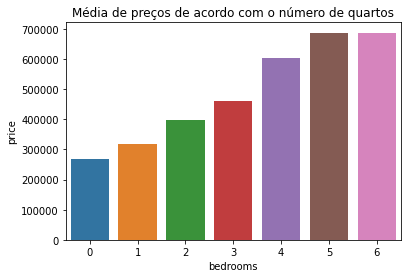

In [31]:
#Variação média de preço de acordo com o número de quarto
#Agrupando os quartos de acordo com a média de preços
sns.barplot(data= df_clean.groupby('bedrooms', as_index=False).mean(),y='price',x='bedrooms')
plt.title('Média de preços de acordo com o número de quartos')
plt.show()

In [32]:
#Observe a diferença entre os gráficos do Plotly para o seaborn

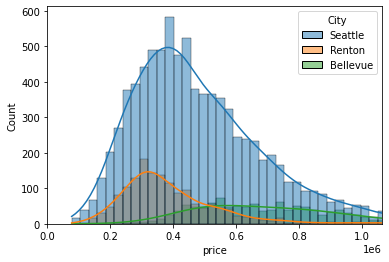

In [33]:
#Avaliando a faixa de preço mais comum dentre as 3 localidades com mais imóveis
#Observar os "C" de city, é maisculo
df_city =  df_clean[df_clean.City.isin(df_clean.City.value_counts()[:3].index)]
sns.histplot(data=df_city,x='price',hue='City',kde=True)
plt.xlim([0,df_city.price.median() + 2*df_city.price.std()])

plt.show()

In [37]:
#Três cidades com maiores  números como mostrado acima
#as_index=False é efetivamente uma saída agrupada “estilo SQL”.
#Agrupando a coluna por cidade
#agregar(.agg) reunir em uma só todas as partes que não têm entre si ligação natural.
df_city_group = df_city.groupby('City', as_index=False).agg({'price':['min','mean','median','max','std']})
#.joi(col) juntando colunas e um outro dataframe por índice de uma só vez, passando uma lista.
#.strip --> O método strip() remove quaisquer caracteres iniciais (espaços no início) e finais (espaços no final) 
#(espaço é o caractere inicial padrão a ser removido)
#O método column.values ​​retorna uma matriz de índice
df_city_group.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df_city_group.columns.values]
df_city_group

,City,price_min,price_mean,price_median,price_max,price_std
0,Bellevue,247500.00,803956.88,720000.00,2450000.00,372882.66
1,Renton,95000.00,392226.52,354200.00,2230000.00,166939.86
2,Seattle,78000.00,519475.78,450000.00,2450000.00,285747.69


In [41]:
#5 cidades com mais imóveis a venda
#Retorna as cidades contendo quantidade de imóveis a serem vendidos,o default(padrão) é em ordem decrescente
df_clean.City.value_counts()[:5]

Seattle     8794
Renton      1558
Bellevue    1294
Kent        1185
Kirkland     954
Name: City, dtype: int64

Cálculos finais e conclusões

In [53]:
#Escolher os 5 que tiveram mais lucros nas cidades de Seattle, Renton e Bellevue
df_sorted_agg = df_clean.groupby(['id','zipcode','City'], as_index=False).agg({'price':['min','mean', 'max'],
                                                        '$/ft2_living':'mean','profit': ['max','min']})

df_sorted_agg.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df_sorted_agg.columns.values]
#sort_values --> Classifique o dataframe de acordo com a coluna profit_max
df_sorted_agg.sort_values('profit_max',ascending=False, inplace=True)
df_sorted_agg.head()
#Ou seja, o critério de sucesso dessa analise foi em cima do lucro máximo(profit_max)

,id,zipcode,City,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
17044,7888000390,98198,Seattle,140000.00,187500.00,235000.00,176.89,95000.00,0.00
16270,7657000540,98178,Seattle,165000.00,212500.00,260000.00,174.18,95000.00,0.00
3472,1524079093,98024,Fall City,275000.00,322250.00,369500.00,247.88,94500.00,0.00
3291,1446403850,98168,Seattle,118125.00,165062.50,212000.00,208.94,93875.00,0.00
16941,7856400300,98006,Bellevue,1411600.00,1458300.00,1505000.00,458.58,93400.00,0.00


In [56]:
#Não sei do que se trata
choice = df_sorted_agg[df_sorted_agg.City.isin(['Seatle','Renton','Bellevue'])].head()
choice

,id,zipcode,City,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
16941,7856400300,98006,Bellevue,1411600.00,1458300.00,1505000.00,458.58,93400.00,0.00
11899,5054800110,98055,Renton,238000.00,283000.00,328000.00,126.34,90000.00,0.00
3174,1432400120,98058,Renton,165000.00,210000.00,255000.00,207.92,90000.00,0.00
18211,8645530010,98058,Renton,225000.00,260000.00,295000.00,185.71,70000.00,0.00
7347,2892700041,98055,Renton,168000.00,203000.00,238000.00,148.18,70000.00,0.00


In [59]:
#5 piores imóveis - pois tiveram prejuízos nas vendas
df_sorted_agg.sort_values('profit_min',ascending=True, inplace=True)
df_sorted_agg.head()

,id,zipcode,City,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
14950,7167000040,98010,Black Diamond,700000.00,720000.00,740000.00,214.93,0.00,-40000.00
6735,2726049071,98125,Seattle,489950.00,499975.00,510000.00,609.73,0.00,-20050.00
6837,2767603612,98107,Seattle,489000.00,494500.00,500000.00,383.33,0.00,-11000.00
18475,8682262400,98053,Redmond,419950.00,424975.00,430000.00,314.80,0.00,-10050.00
6527,2619920170,98033,Kirkland,765000.00,768750.00,772500.00,238.00,0.00,-7500.00


- Respondendo aos questionamentos


1.   A Questão do Negócio:
> Qual a minha meta?

*  Garantir um investimento de imóvel em King que me retorne um lucro futuramente

> Como posso chegar?

*  Escolhendo 5 imóveis que tem maior chance de venda e com melhores lucros históricos

2.   O Entendimento do Negócio:
> Quais dados eu tenho disponível?

*   São diversos atributos de imóveis que foram vendidos no Condado de King de Maio de 2014 até 2015. Expressam dados gerais do imóvel como tamanho, quartos e preços de venda, porém tem dados de qualidade como beleza de vista e qualidade do material utilizado na construção. Também existem as variáveis de localização dos imóveis.

> Eles são relevantes para o problema?

*  Quase todos os atributos nesse caso são relevantes, pricipalmente aquele que podemos associar com preços de vendas, como número de quartos, área habitável e se é na beira da praia ou não.

> Eles me trazem uma solução direta?

*   Eles me trazem disvrsas opções e noções, porém ainda não é possível escolher um imóvel que possamos afirmar que a chance dele é dar um lucro alto


3.   A Coleta de Dados

> Os dados que eu tenho fazem sentidos?

*   Sim. Não existe nenhum valr ausente. Entretanto, existem atributos com interpretações subjetivas como por exemplo o floor, indicando quantos andares tem uma casa com valores decimais, como se fosse um sótão talvez

> Estão no formato que eu gostaria?

*   Elgusn dados precisam ser formatados como o Data

> O que mais eu consgio obter de informações com esses dados?

*   Alguns dos insights aplicados no problema foi o preço por área, cidade em que se localiza o imóvel e o lucro ou perda financeira baseados na venda do imóvel durante o período.

4.   A Limpeza do Dados
5.   Data

*   A data veio num formato diferente do usual, portanto foi feita uma tratativa para limpar os dados
Remoção de dados outliers e valores ausentes. O dataset não apresentava valores ausentes. Já a situação de outilers, foi utilizada o percentil de 99,5% de algumas colunas para filtrar dos dados finais

6.   Exploração dos Dados

> Visualização dos Dados

*   É possível montar diversas visualizações de dados e análises, porém limitou-se a ver a média de preço por área em cada cidade, a distribuição de preço das 3 cidades com mais imóveis

> Quais as minhas métricas essenciais?

*  Para a escolha dos melhores imóveis, foi considerado o lucro de venda do imóvel dentro de 1 ano e a cidade onde ele se encontra

> Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar?

*   Utilizando essas métricas da etapa anterior, o ideial é escolher imóveis que apresentaram  uma revenda ao longo do período























































